#**1. Understanding the Problem Statement**
**Problem Statement:**

The Titanic disaster is one of the most infamous shipwrecks in history, with a loss of over 1,500 lives. In this project, the central question is: **"What factors contributed most to the survival of passengers, and how can understanding these factors provide insights into historical maritime disasters?**"

The sinking of the RMS Titanic in 1912 remains a poignant example of maritime disaster, influenced by a myriad of factors ranging from engineering flaws to historical social norms that affected passenger survival rates. By analyzing a dataset of passenger information, this project aims to uncover patterns and predictors that determined the likelihood of survival. This analysis could offer more than just historical insights—it might also contribute to safety regulations and design standards in modern maritime travel.

### **Import Relevant libraies**

In [ ]:
# Importing libraries for data handling
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # For handling missing data
import missingno as msno  # For visualizing missing data patterns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Utilities for model building and preprocessing
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/titanic'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/titanic


In [ ]:
# Load the Titanic dataset from system
train = pd.read_csv('train.csv')  # Path to the training data file
test = pd.read_csv('test.csv')    # Path to the test data file


# **2. Statistical EDA**

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
train.sample(6)

PassengerId  Survived  Pclass                           Name     Sex  \
36            37         1       3               Mamee, Mr. Hanna    male   
259          260         1       2    Parrish, Mrs. (Lutie Davis)  female   
20            21         0       2           Fynney, Mr. Joseph J    male   
530          531         1       2       Quick, Miss. Phyllis May  female   
627          628         1       1  Longley, Miss. Gretchen Fiske  female   
805          806         0       3      Johansson, Mr. Karl Johan    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
36    NaN      0      0    2677   7.2292   NaN        C  
259  50.0      0      1  230433  26.0000   NaN        S  
20   35.0      0      0  239865  26.0000   NaN        S  
530   2.0      1      1   26360  26.0000   NaN        S  
627  21.0      0      0   13502  77.9583    D9        S  
805  31.0      0      0  347063   7.7750   NaN        S

In [ ]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## **Numerical and categorical columns are**

In [ ]:
# Defining numerical & categorical columns training data
numeric_features = [feature for feature in train.columns if train[feature].dtype != 'O']
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# Defining numerical & categorical columns test data
numeric_features = [feature for feature in test.columns if test[feature].dtype != 'O']
categorical_features = [feature for feature in test.columns if test[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### **Size of dataset**

In [ ]:
# Print the number of rows and columns in train data
print("Size of the dataset:", train.shape)
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Size of the dataset: (891, 12)
Number of rows: 891
Number of columns: 12


In [ ]:
# Print the number of rows and columns in test data
print("Size of the dataset:", test.shape)
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Size of the dataset: (418, 11)
Number of rows: 418
Number of columns: 11


## **Summary of train and test data**

In [ ]:
print('The size of Dataframe is: ', train.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
# Get a concise summary of the training data, including essential information about the DataFrame's structure, overall layout and data types.
train.info()
print('-'*100)

The size of Dataframe is:  (891, 12)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------

##**Insight from train data**

The dataset includes integer and float type columns like Age, Fare, Pclass, SibSp, and Parch.
it also includes object string columns like Name, Sex, Ticket, Cabin, and Embarked, which are categorical features.

The output highlights missing or null values in three columns of the dataset:

**Age:** has 332 non-null entries out of a possible 418, indicating 86 missing values.

**Fare:** Fare is nearly complete but has one missing value, with 417 non-null entries.

**Cabin:** shows a significant number of missing entries, with only 91 non-null out of 418, indicating that 327 values are missing.

In [ ]:
print('The size of Dataframe is: ', test.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
test.info()
print('-'*100)

The size of Dataframe is:  (418, 11)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
--------------------------------------------------------------------------------------

##**Insight from test data**


The dataset contains missing values in several columns, notably:

**Age:** Out of 891 entries, 714 are non-null, indicating that 177 values are missing.

**Cabin:** This column has the most significant number of missing values, with only 204 non-null entries out of 891, pointing to 687 missing values.

**Embarked:** Only 2 values are missing, with 889 non-null entries out of 891.

In [ ]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0dc7daea33ed51bc3e9af3eb685d27aedeee2264b9b9fd6caedb041b61824c9a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Using the ydata_profiling package, generate a profile report for the training data.
from ydata_profiling import ProfileReport
profile = ProfileReport(train,
                        title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Create metadata Meta2, with more user-friendly  variable labels.
# Binary, Categorical (Nominal), Real (Interval), Integer (Ordinal)
#Creating a Meta Data to give the Titanic data better  data organisation and analysis
data = []
#Defining the role
for feature in train.columns:
  if feature =='Survived':
    use ='target'
  elif feature =='PassengerId':
    use ='id'
  else:
    use ='input'

  #Defining the type
  if feature =='Survived':
    type = 'binary'
  elif feature in ['PassengerId','Name', 'Sex','Embarked','Pclass','Ticket','Cabin']:
    type = 'categorical'
  elif train[feature].dtype == float:
    type = 'real'
  elif train[feature].dtype == int:
    type = 'integer'
  else:
    type = 'None'

  #initialize preserve to True for all variables except PassengerID

  preserve = True
  if feature in ['PassengerId','Name']:
    preserve = False

  # Defining the data type
  dtype =train[feature].dtype

  feature_dict = {
    'name': feature,
     'use': use,
    'type': type,
    'preserve': preserve,
    'dtype': dtype

     }

  data.append(feature_dict)

meta2 = pd.DataFrame(data, columns = ['name','use','type','preserve','dtype'])

meta2.set_index('name', inplace = True)

meta2

use         type  preserve    dtype
name                                               
PassengerId      id  categorical     False    int64
Survived     target       binary      True    int64
Pclass        input  categorical      True    int64
Name          input  categorical     False   object
Sex           input  categorical      True   object
Age           input         real      True  float64
SibSp         input      integer      True    int64
Parch         input      integer      True    int64
Ticket        input  categorical      True   object
Fare          input         real      True  float64
Cabin         input  categorical      True   object
Embarked      input  categorical      True   object

# **Missing Values**

In [ ]:
print('Missing Value Presence in different columns of DataFrame of training data are as follows : ')
print('-'*100)
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the missing data frame
missing_data


Missing Value Presence in different columns of DataFrame of training data are as follows : 
----------------------------------------------------------------------------------------------------


Total    Percent
Cabin          687  77.104377
Age            177  19.865320
Embarked         2   0.224467
PassengerId      0   0.000000
Name             0   0.000000
Pclass           0   0.000000
Survived         0   0.000000
Sex              0   0.000000
Parch            0   0.000000
SibSp            0   0.000000
Fare             0   0.000000
Ticket           0   0.000000

## **Observation**
*  cabin and age has most of the missing values
* Age: 327 missing
* Cabin 86 missing
* Fare 1 misisng value

In [ ]:
print('Missing Value Presence in different columns of DataFrame of test data are as follows : ')
print('-'*100)
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the missing data frame
missing_data


Missing Value Presence in different columns of DataFrame of test data are as follows : 
----------------------------------------------------------------------------------------------------


Total    Percent
Cabin          327  78.229665
Age             86  20.574163
Fare             1   0.239234
Name             0   0.000000
Pclass           0   0.000000
PassengerId      0   0.000000
Sex              0   0.000000
Parch            0   0.000000
SibSp            0   0.000000
Ticket           0   0.000000
Embarked         0   0.000000

## **Observation**
*  cabin and age has most of the missing values
* Age: 177 missing
* Cabin 687 missing
* Embarked 2 misisng value

## **Summary Statistics for Numerical Columns**

In [ ]:
# Displaying summary statistics for numerical columns in the DataFrame
numerical_summary = train.describe()
print("Summary Statistics for Numerical Columns:")
numerical_summary

Summary Statistics for Numerical Columns:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### **Insights on Numerical statics**

**Dataset Size:** Includes 418 entries, indicating analysis of 418 passengers.

**Passenger Class (Pclass):**
- Mean class level is 2.27, suggesting a majority in lower classes.
- Values range from 1 (highest class) to 3 (lowest class), indicating proper classification without outliers.

**Age:**
- Not all data is available; 86 ages are missing.
- Age range from 0.17 years (infants) to 76 years, with an average around 30 years, pointing to a predominantly young demographic.
- The age distribution shows moderate variability with a standard deviation of 14.18 years.

**Siblings/Spouses (SibSp):**
- Average of 0.45 indicates most passengers traveled without siblings or spouses.
- A maximum value of 8 suggests the presence of at least one large family.
Parents/Children (Parch):
- Average near 0.39, similar to SibSp, suggests few traveled with parents or children.
- The maximum of 9 indicates some passengers possibly traveled with extended family.

**Fare:**
- Wide range from free (0) to 512.33, reflecting a broad spectrum of ticket prices across different classes.
- Mean fare is 35.63 with a high standard deviation of 55.91, indicating significant fare variability.
- Most fares are below the average, suggesting the presence of some very expensive tickets skewing the mean higher.

## **Summary Statistics for Categorical Columns**

In [ ]:
# Displaying summary statistics for categorical columns by including only object types
categorical_summary = train.describe(include=['object'])
print("\nSummary Statistics for Categorical Columns:")
categorical_summary


Summary Statistics for Categorical Columns:


Name   Sex Ticket    Cabin Embarked
count                   891   891    891      204      889
unique                  891     2    681      147        3
top     Dooley, Mr. Patrick  male   1601  B96 B98        S
freq                      1   577      7        4      644

###**Insights from Categorical Columns**

**Name:** Each of the 418 passengers is uniquely identified, with no repetitions in names.

**Sex:** The dataset predominantly features male passengers, with males accounting for 266 of the 418 entries.

**Ticket:** A variety of 363 unique ticket numbers exist, with "PC 17608" being shared the most, by five passengers.

**Cabin:** Sparse cabin data is available for only 91 passengers, with "B57 B59 B63 B66" appearing most frequently.

**Embarked:** Southampton is the main embarkation point, with 270 out of 418 passengers starting their journey there.

# **3. Graphical EDA**

### **Univariate Analysis on Numerical Features**

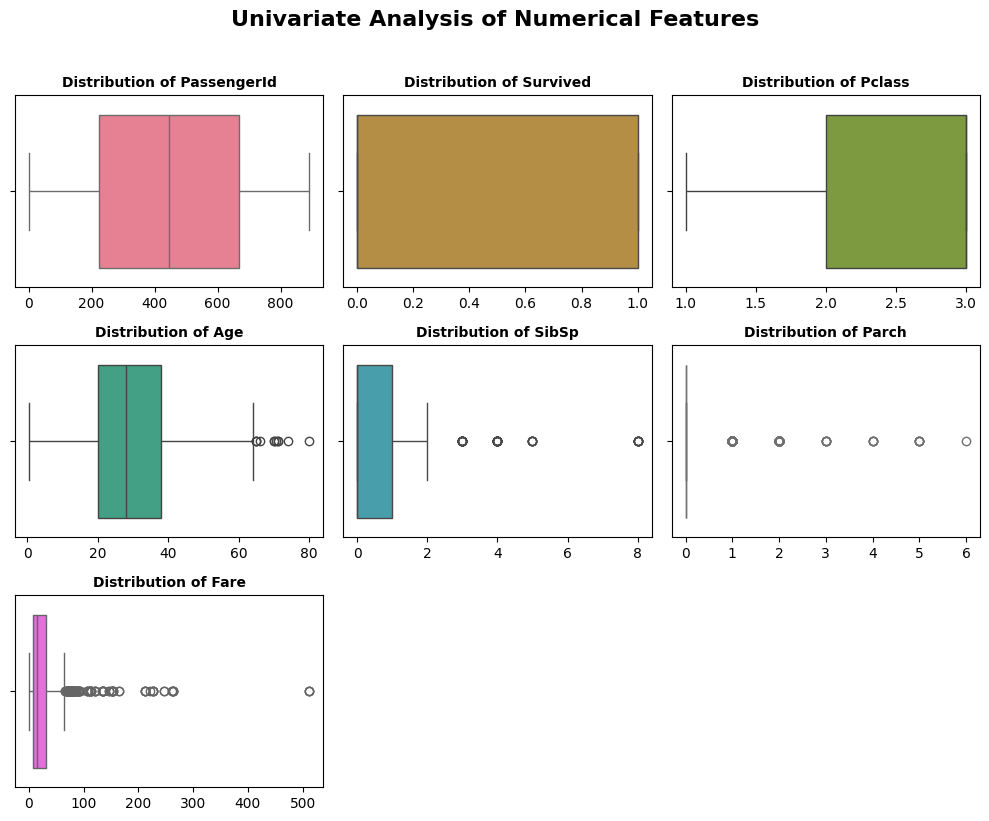

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numeric_features = [feature for feature in train.columns if train[feature].dtype != 'O']

# Set a colorful palette for unique colors
colors = sns.color_palette("husl", len(numeric_features))  # Using the 'husl' palette for vibrant colors

# Initialize the figure
plt.figure(figsize=(10, 8))  # Compact figure size
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=16, fontweight='bold', y=1.02)

# Create box plots for each numerical feature
for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)  # Adjust grid size based on the number of features
    sns.boxplot(x=train[numeric_features[i]], color=colors[i])  # Assign a unique color for each plot
    plt.title(f'Distribution of {numeric_features[i]}', fontsize=10, fontweight='bold')  # Insightful title
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.tight_layout()

# Show the plots
plt.show()


**Observations:**

- Outliers are prominent in Age, SibSp, Parch, and especially Fare, which may require careful handling during preprocessing.
- Most passengers traveled alone or in small family units and paid lower fares, aligning with the predominance of 3rd class passengers.

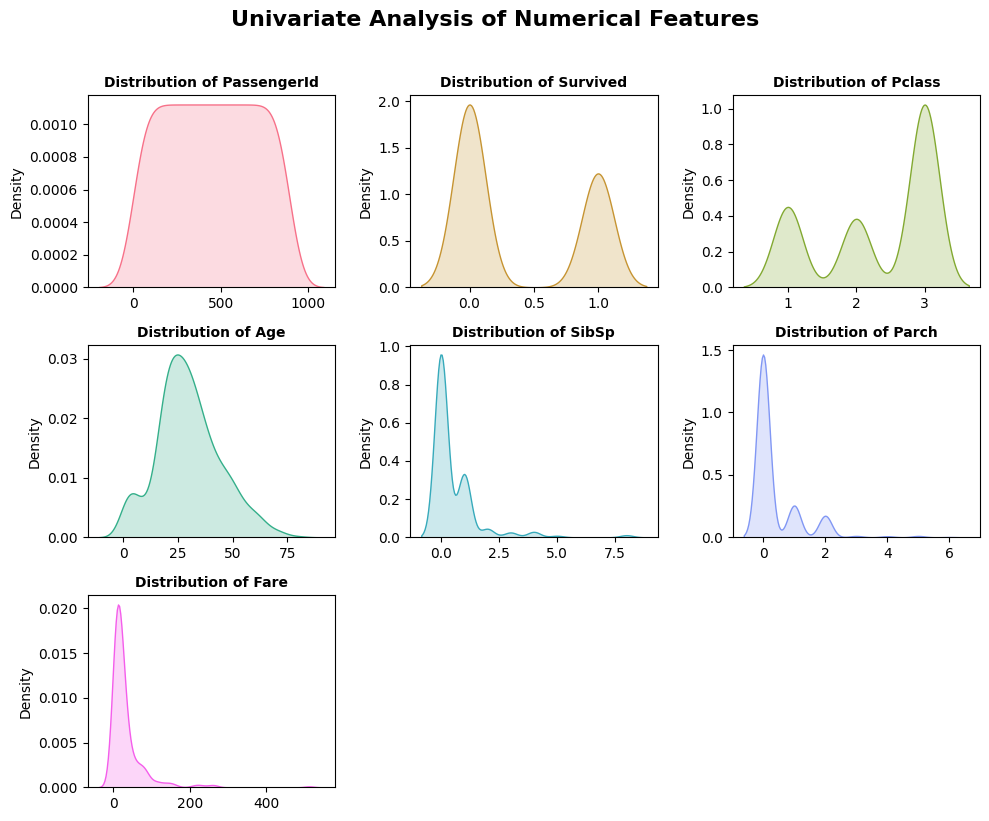

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features explicitly using select_dtypes
numeric_features = train.select_dtypes(include=[float, int]).columns

# Set a colorful palette for unique colors
colors = sns.color_palette("husl", len(numeric_features))  # Using the 'husl' palette for vibrant colors

# Initialize the figure
plt.figure(figsize=(10, 8))  # Compact figure size
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=16, fontweight='bold', y=1.02)

# Create KDE plots for each numerical feature
for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)  # Adjust grid size based on the number of features
    sns.kdeplot(train[numeric_features[i]], color=colors[i], fill=True)  # KDE plot with fill
    plt.title(f'Distribution of {numeric_features[i]}', fontsize=10, fontweight='bold')  # Insightful title
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.tight_layout()

# Show the plots
plt.show()


##**Insights from the Univariate Analysis KDE Plot:**

**PassengerId:** Uniform distribution, acting as an identifier.

**Pclass:** Most passengers were in 3rd class, followed by 2nd and 1st.

**Age:** Right-skewed, with a peak around 20-30 years.

**SibSp:** Majority of passengers traveled alone or with one sibling/spouse.

**Parch:** Most passengers traveled without parents/children.

**Fare:** Right-skewed, with a few passengers paying very high fares.

**Survived:** Majority did not survive, with a survival rate of ~38%.

**FamilySize:** Most passengers traveled with small families (size 1-2).

These insights highlight the passenger demographics and survival trends on the Titanic.

### **Univariate Analysis on Categorical Features**

<ipython-input-26-33cf736d6727>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=train, ax=axes[0, 0], palette=sex_colors)
<ipython-input-26-33cf736d6727>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=train, ax=axes[0, 1], palette=embarked_colors)
<ipython-input-26-33cf736d6727>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=train, ax=axes[0, 2], estimator='mean', palette=pclass_colors)
<ipython-input-26-33cf736d6727>:42: FutureWarning: 

Passing `palette` without assign

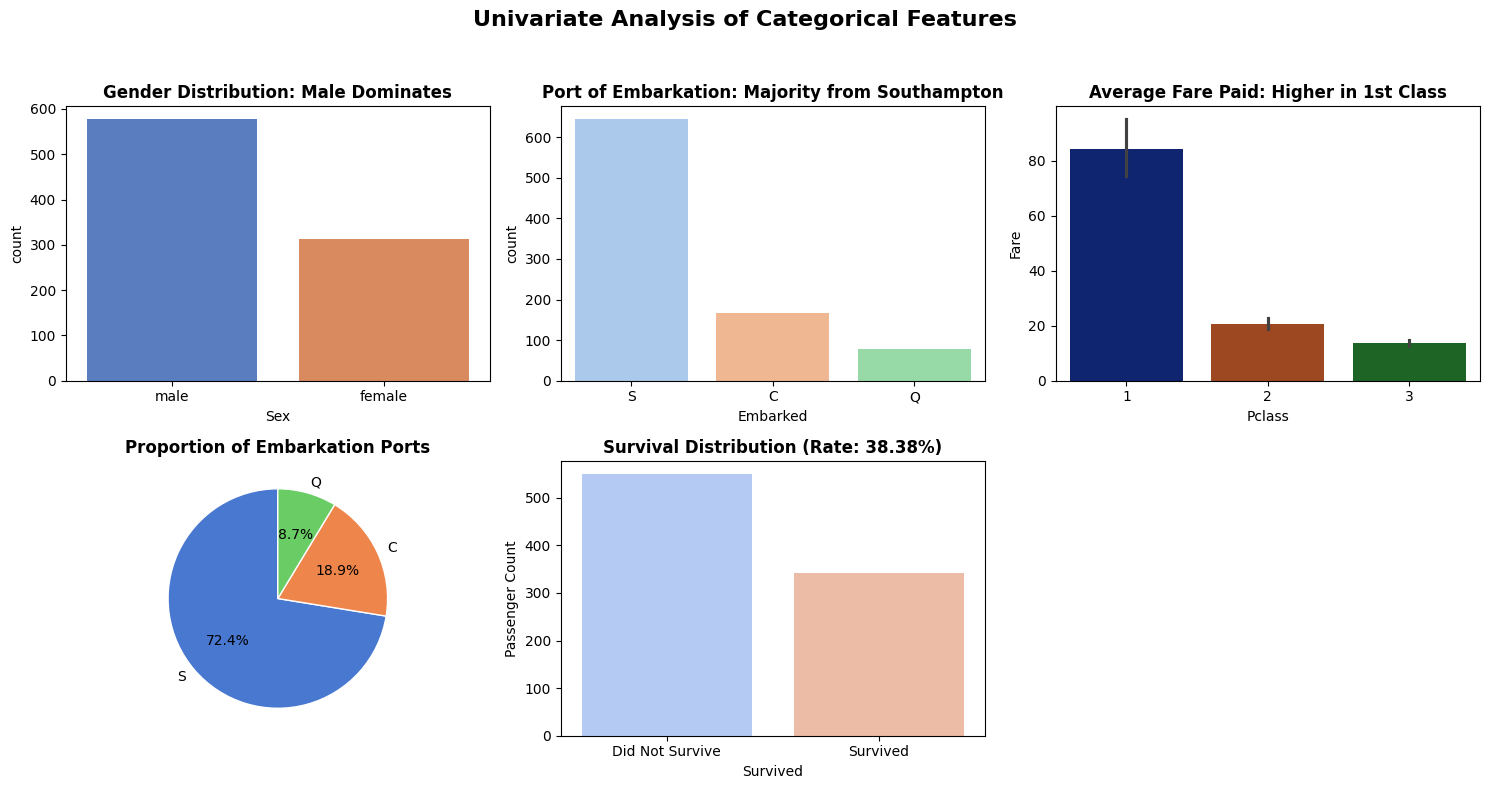

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define color palettes for the charts
sex_colors = sns.color_palette("muted", 2)       # Medium-dark palette for 'Sex'
embarked_colors = sns.color_palette("pastel", 3) # Softer tones for 'Embarked'
pclass_colors = sns.color_palette("dark", 3)     # Dark but balanced colors for 'Pclass'
pie_colors = sns.color_palette("muted", 3)       # Medium-dark tones for the pie chart
survival_colors = sns.color_palette("coolwarm", 2)  # Red and blue for survival chart

# Set figure size and overall title
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Adjusted grid for 5 plots
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=16, fontweight='bold')

# Subplot 1: Count Plot for 'Sex'
sns.countplot(x='Sex', data=train, ax=axes[0, 0], palette=sex_colors)
axes[0, 0].set_title("Gender Distribution: Male Dominates", fontsize=12, fontweight='bold')

# Subplot 2: Count Plot for 'Embarked'
sns.countplot(x='Embarked', data=train, ax=axes[0, 1], palette=embarked_colors)
axes[0, 1].set_title("Port of Embarkation: Majority from Southampton", fontsize=12, fontweight='bold')

# Subplot 3: Bar Plot for Average Fare by 'Pclass'
sns.barplot(x='Pclass', y='Fare', data=train, ax=axes[0, 2], estimator='mean', palette=pclass_colors)
axes[0, 2].set_title("Average Fare Paid: Higher in 1st Class", fontsize=12, fontweight='bold')

# Subplot 4: Pie Chart for 'Embarked'
train['Embarked'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[1, 0],
    startangle=90,
    colors=pie_colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
axes[1, 0].set_title("Proportion of Embarkation Ports", fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('')  # Remove y-axis label

# Subplot 5: Survival Distribution
survival_counts = train['Survived'].value_counts()
survival_rate = train['Survived'].mean()
sns.barplot(x=survival_counts.index, y=survival_counts.values, ax=axes[1, 1], palette=survival_colors)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Did Not Survive', 'Survived'])
axes[1, 1].set_title(f"Survival Distribution (Rate: {survival_rate:.2%})", fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel("Passenger Count")

# Hide empty subplot (if needed)
axes[1, 2].axis('off')

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##**Bivariate Analysis of Numerical Features**

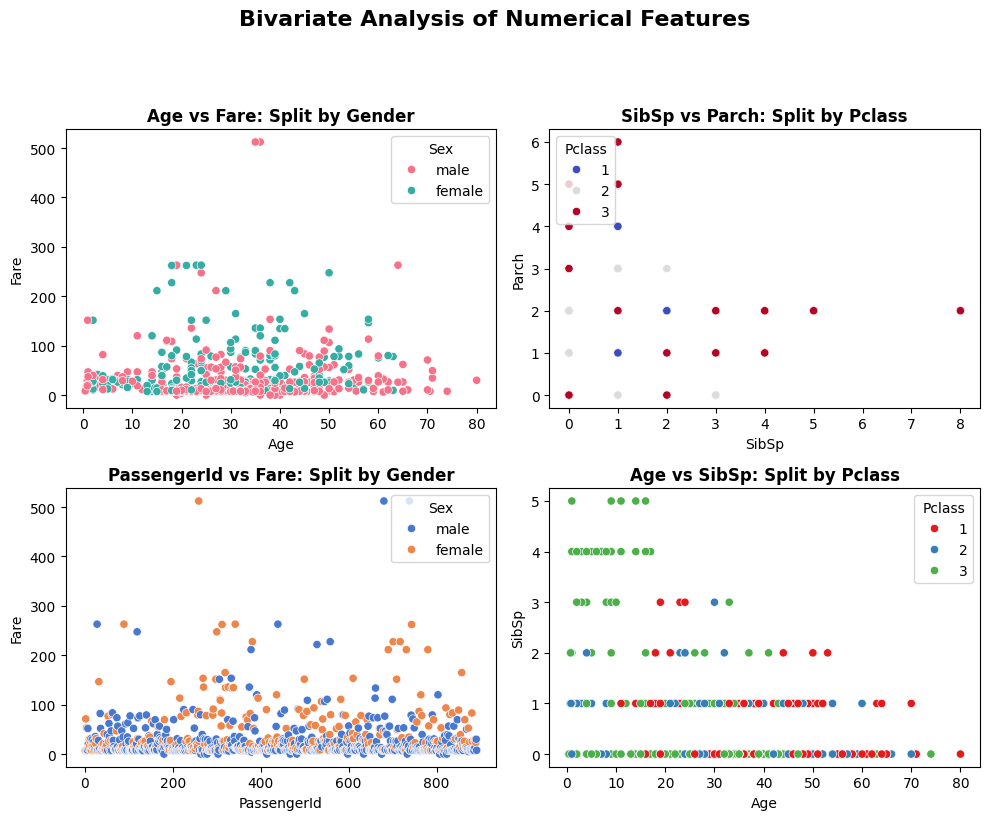

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Smaller subplot size
plt.suptitle("Bivariate Analysis of Numerical Features", fontsize=16, fontweight='bold', y=1.02)

# 1. Scatter Plot: Age vs Fare (hue='Sex')
sns.scatterplot(x='Age', y='Fare', data=train, ax=axes[0, 0], hue='Sex', palette='husl')
axes[0, 0].set_title('Age vs Fare: Split by Gender', fontsize=12, fontweight='bold')
axes[0, 0].legend(title='Sex', loc='upper right')  # Adding legend

# 2. Scatter Plot: SibSp vs Parch (hue='Pclass')
sns.scatterplot(x='SibSp', y='Parch', data=train, ax=axes[0, 1], hue='Pclass', palette='coolwarm')
axes[0, 1].set_title('SibSp vs Parch: Split by Pclass', fontsize=12, fontweight='bold')
axes[0, 1].legend(title='Pclass', loc='upper left')  # Adding legend

# 3. Scatter Plot: PassengerId vs Fare (hue='Sex')
sns.scatterplot(x='PassengerId', y='Fare', data=train, ax=axes[1, 0], hue='Sex', palette='muted')
axes[1, 0].set_title('PassengerId vs Fare: Split by Gender', fontsize=12, fontweight='bold')
axes[1, 0].legend(title='Sex', loc='upper right')  # Adding legend

# 4. Scatter Plot: Age vs SibSp (hue='Pclass')
sns.scatterplot(x='Age', y='SibSp', data=train, ax=axes[1, 1], hue='Pclass', palette='Set1')
axes[1, 1].set_title('Age vs SibSp: Split by Pclass', fontsize=12, fontweight='bold')
axes[1, 1].legend(title='Pclass', loc='upper right')  # Adding legend

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insights from Each Graph**

**Age vs Fare:** Split by Gender

Younger passengers (0-20) paid lower fares, with a few high-fare outliers for older passengers.
Females are more likely to appear in the high-fare range.

**SibSp vs Parch:** Split by Pclass

Most passengers had small family sizes (SibSp ≤ 2, Parch ≤ 2).
Larger family sizes are more common in 3rd class (red dots).

**PassengerId vs Fare:** Split by Gender

Fares are highly variable, with occasional spikes above 200 for both genders.
Males dominate the lower fare ranges, while females appear more consistently at higher fares.

**Age vs SibSp:** Split by Pclass

Younger passengers (0-10) tend to have larger sibling/spouse counts.
Passengers in 3rd class (green) have higher SibSp values compared to 1st and 2nd class.

#**Bivariate Analysis Of Features**

##**Survival Rate by Gender (Stacked Bar Plot)**

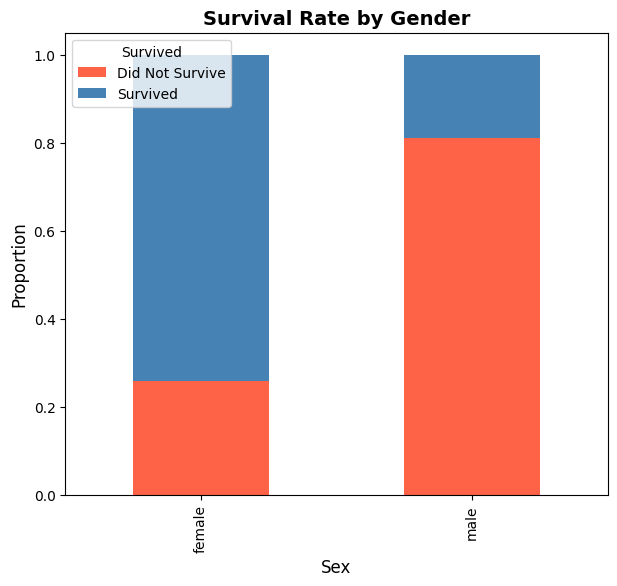

In [ ]:
# Stacked Bar Plot for 'Sex' vs 'Survived'
plt.figure(figsize=(7, 6))
survived_sex = pd.crosstab(train['Sex'], train['Survived'], normalize='index')
survived_sex.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'], loc='upper left')
plt.show()


**Insight:**
- Female passengers have a significantly higher survival rate than male passengers.
- More females survived than males, suggesting gender played a critical role in survival.

## **Survival by Passenger Class (Grouped Bar Plot)**

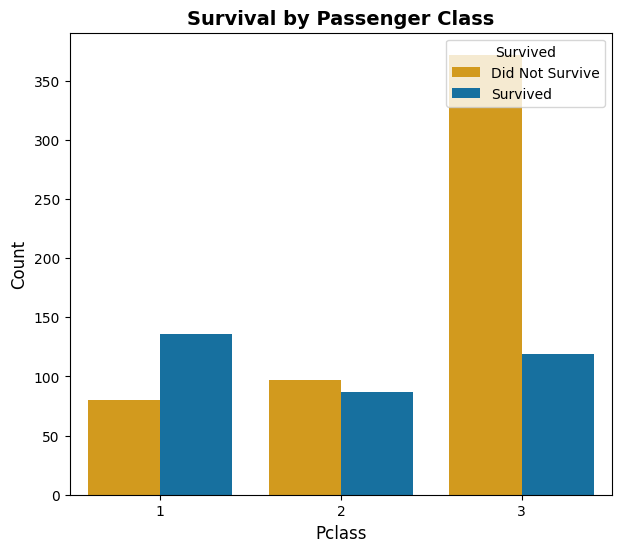

In [ ]:
# Grouped Bar Plot for 'Pclass' vs 'Survived'
plt.figure(figsize=(7, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette=['#F0A500', '#0077B6'])
plt.title('Survival by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'], loc='upper right')
plt.show()

**Insight:**
- First-class passengers had the highest survival rate.
-  Third-class passengers had the lowest survival rate, reflecting class-based survival differences during the Titanic disaster.

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## **Survival Rate by Age (Binned Bar Plot)**

<ipython-input-31-9f9fc29d3015>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train.groupby('AgeGroup')['Survived'].mean()
<ipython-input-31-9f9fc29d3015>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival.index, y=age_survival.values, palette="viridis")


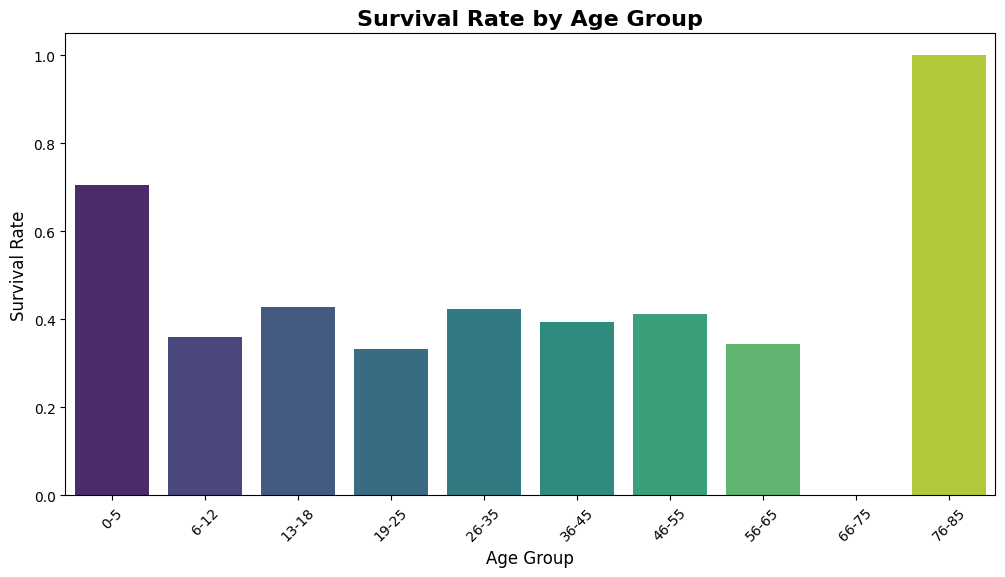

In [ ]:
# Define age bins for categorization
bins = [0, 5, 12, 18, 25, 35, 45, 55, 65, 75, 85]
labels = ['0-5', '6-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate survival rates by these age groups
age_survival = train.groupby('AgeGroup')['Survived'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=age_survival.index, y=age_survival.values, palette="viridis")
plt.title('Survival Rate by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Young passengers (aged 0-5) had a higher survival rate.
- Passengers aged 76-85 and 80+ had the highest survival rates, indicating that older passengers were prioritized in lifeboats or rescued early.

## **Survival Rate by Family Size (Bar Plot)**

<ipython-input-32-814761d406bf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_survival.index, y=family_survival.values, palette="muted")


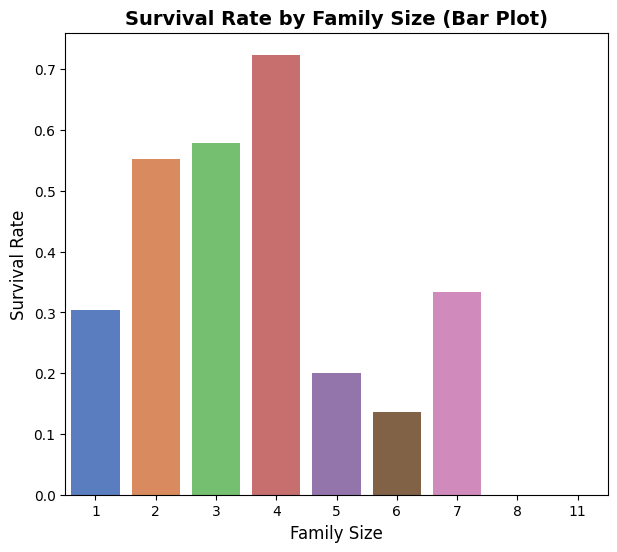

In [ ]:
# Create 'FamilySize' column by adding 'SibSp' and 'Parch' and adding 1 (for the passenger themselves)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Now create the plot
plt.figure(figsize=(7, 6))
family_survival = train.groupby('FamilySize')['Survived'].mean()
sns.barplot(x=family_survival.index, y=family_survival.values, palette="muted")
plt.title("Survival Rate by Family Size (Bar Plot)", fontsize=14, fontweight='bold')
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.show()


**Insight**:
- Passengers with 2 to 3 family members had the highest survival rates, possibly because they could move faster and help each other more easily. Larger families, with more than 5 members, had lower survival rates, likely due to the difficulty of moving and coordinating together in an emergency. People traveling alone had lower survival rates, as they had no one to help them during the crisis.

## **Survival by Embarkation Port (Count Plot)**

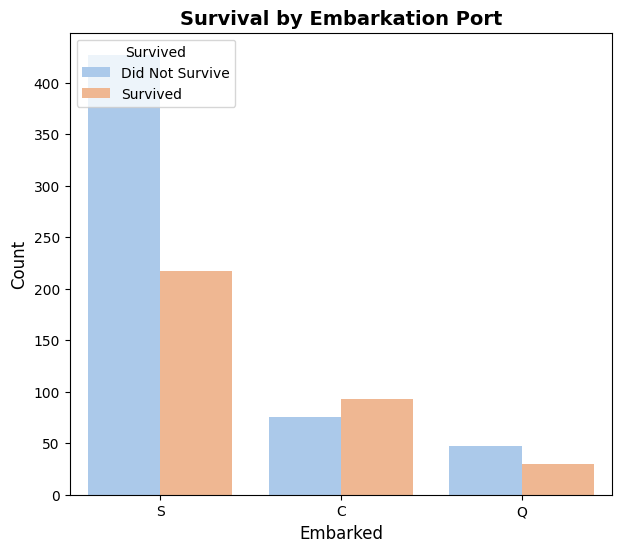

In [ ]:
# Count Plot for 'Embarked' vs 'Survived'
plt.figure(figsize=(7, 6))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='pastel')
plt.title('Survival by Embarkation Port', fontsize=14, fontweight='bold')
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'], loc='upper left')
plt.show()

**Insight**:
- Southampton (S) has the highest number of passengers, but the survival rate was lower compared to Cherbourg (C).
- Passengers from Cherbourg (C) had a higher survival rate, indicating potential differences in class distribution or survival prioritization by port.

## **Mulivariate analysis of numerical features**

##**Insights from the Correlation Matrix:**
**Strong Positive Correlations:**

- SibSp and FamilySize (0.89): Larger families tend to have more siblings/spouses.
- Parch and FamilySize (0.78): More parents/children aboard correlate with larger families.
- Survived and FamilySize (0.30): Passengers with families had a slightly higher chance of survival.

**Negative Correlations:**

- Fare and Pclass (-0.55): Passengers in lower classes (3rd class) paid less fare.
- Survived and Pclass (-0.34): Lower class passengers had lower survival rates.

**Moderate Correlations:**

- SibSp and Parch (0.41): Passengers with more siblings/spouses also often had more parents/children.
- SibSp and Survived (0.30): Larger family groups might have had better survival chances.

**Weak Correlations:**

- Age and Survived (-0.30): Older passengers had slightly lower survival rates.
- FamilySize and Age (0.07): No significant correlation between family size and age.

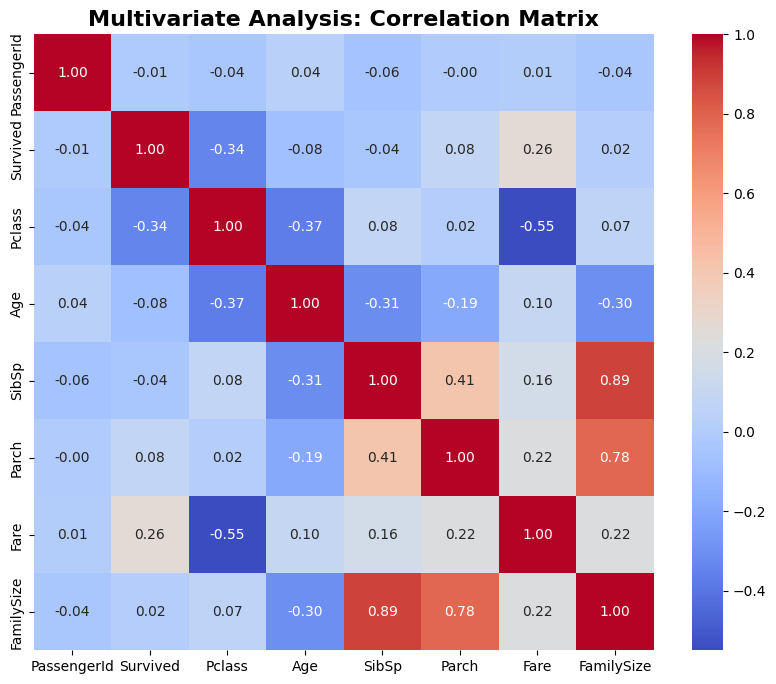

In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multivariate Analysis: Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()

#**Ethical Considerations:**
**Gender Bias:**

Women had a significantly higher survival rate than men, which might reflect a gender-based priority in the rescue process. This could be due to the "women and children first" policy in place at the time.

**Class Bias:**

Passengers in higher classes (e.g., 1st class) had a better chance of survival. This suggests a class-based bias, where wealthier passengers were more likely to have access to lifeboats and rescue efforts, highlighting systemic inequality.

**Age Bias:**

Children had a higher survival rate, as they were likely given priority in rescue efforts, which may reflect an ethical decision to protect the most vulnerable individuals.

**Family Size Bias:**

Passengers traveling in smaller families had higher survival rates. This could reflect social dynamics where those traveling alone or with fewer companions were more likely to survive, possibly due to limited availability of lifeboats.

**Embarked Port Bias:**

Passengers from port C (Cherbourg) had a higher survival rate, likely due to the higher proportion of first-class passengers embarking from there. This could indicate that those embarking from wealthier ports had better access to survival resources, emphasizing the influence of socio-economic status on survival chances.

# **4. Data Preparation**

###**check Nan values**

In [ ]:
# Print the total count of missing values in the DataFrame 'train_savepoint1'
train_savepoint1 = train.copy()
print('NaN values =', train_savepoint1.isnull().sum().sum())

NaN values = 1043


**Before treating the mising values, we first need to make sure all the -1 values are replaced by NaN**

In [ ]:
# Function to replace missing indicators (-1 or '') with NaN
def _impute_missing_data(data):
    return data.replace(['', -1], np.nan)

# Apply the imputation function to train and test datasets
train_savepoint1 = _impute_missing_data(train_savepoint1)
##test = _impute_missing_data(test)

# Total number of NaN values
print('Total NaN values in training dataset =', train_savepoint1.isnull().sum().sum())
print('\n--- Missing Values Report ---\n')

# List to track variables with missing values
vars_with_missing = []

# Analyze missing values for each feature in the training dataset
for feature in train_savepoint1.columns:
    missings = train_savepoint1[feature].isna().sum()  # Count of missing values

    if missings > 0:
        vars_with_missing.append(feature)
        missings_perc = (missings / train_savepoint1.shape[0]) * 100  # Percentage of missing values

        print(f'Variable {feature} has {missings} records ({missings_perc:.2f}%) with missing values.')

# Summary of variables with missing values
print(f'\nIn total, there are {len(vars_with_missing)} variables with missing values.')


Total NaN values in training dataset = 1043

--- Missing Values Report ---

Variable Age has 177 records (19.87%) with missing values.
Variable Cabin has 687 records (77.10%) with missing values.
Variable Embarked has 2 records (0.22%) with missing values.
Variable AgeGroup has 177 records (19.87%) with missing values.

In total, there are 4 variables with missing values.


##**Impute Missing Values for 'Age'**

In [ ]:
# Create and apply mean imputer for 'Age'
mean_imputer = SimpleImputer(strategy='mean')
train_savepoint1['Age'] = mean_imputer.fit_transform(train_savepoint1[['Age']])

##**Impute Missing Values for 'Embarked' and AgeGroup**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming train_savepoint1 is already loaded as a DataFrame

# Create the mean imputer for numerical columns (Age)
mean_imputer = SimpleImputer(strategy='mean')
# Apply the imputer to the 'Age' column (train and test)
train_savepoint1['Age'] = mean_imputer.fit_transform(train_savepoint1[['Age']])

# Recategorize 'AgeGroup' based on the updated 'Age' values
age_bins = [0, 12, 18, 40, 60, 100]  # Define age bins
age_labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']  # Define labels for age groups
train_savepoint1['AgeGroup'] = pd.cut(train_savepoint1['Age'], bins=age_bins, labels=age_labels)

# Create the mode imputer for categorical columns (Embarked)
mode_imputer = SimpleImputer(strategy='most_frequent')
# Apply the imputer to the 'Embarked' column (train and test)
train_savepoint1['Embarked'] = mode_imputer.fit_transform(train_savepoint1[['Embarked']]).ravel()  # Flatten the array to 1D

# Check if there are any remaining missing values
print(f"Missing values in train after imputation and recategorization:\n{train_savepoint1.isnull().sum()}")


Missing values in train after imputation and recategorization:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
FamilySize       0
dtype: int64


####**Insights:**

**Mean Imputation for Age:**
- Purpose: Maintains statistical distribution and minimizes bias.
- Details: Used for the numerical column 'Age', preserving the overall distribution by replacing missing values with the column's mean.

**Re-categorization of Age into AgeGroup:**
_ Purpose: Simplifies analyses by grouping continuous age data.
- Details: Updates 'AgeGroup' after imputing 'Age' and bins continuous age data into categorical segments for simpler analysis.

**Mode Imputation for Embarked:**
- Purpose: Preserves original data distribution by filling in the most common category.
- Details: Applied to the categorical column 'Embarked', filling missing entries with the most frequent category to maintain distribution integrity.

## **Removing Unnecessary Columns**

In [ ]:
import pandas as pd

# Assuming train_savepoint1 is already loaded as a DataFrame

# Drop the 'Cabin' column from the DataFrame
train_savepoint1 = train_savepoint1.drop(columns=['Cabin'])
# Reason: 'Cabin' has a high percentage of missing values (over 77%), making it unreliable for predictive modeling or analysis.

# Drop the 'Name' column from the DataFrame
train_savepoint1 = train_savepoint1.drop(columns=['Name'])
# Reason: 'Name' is highly specific and variable, with unique values that do not directly contribute to predictive analysis such as survival on the Titanic.

# Drop the 'PassengerId' column from the DataFrame
train_savepoint1 = train_savepoint1.drop(columns=['PassengerId'])
# Reason: 'PassengerId' is merely an identifier for each passenger and holds no intrinsic predictive value for the analysis or modeling purposes.

# Drop the 'Ticket' column from the DataFrame
train_savepoint1 = train_savepoint1.drop(columns=['Ticket'])
# Reason: 'Ticket' numbers are non-standardized and high in cardinality, which complicates their use in predictive modeling and does not offer clear predictive or analytical value.

# Display the updated DataFrame
train_savepoint1.head()


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked AgeGroup  \
0         0       3    male  22.0      1      0   7.2500        S    Adult   
1         1       1  female  38.0      1      0  71.2833        C    Adult   
2         1       3  female  26.0      0      0   7.9250        S    Adult   
3         1       1  female  35.0      1      0  53.1000        S    Adult   
4         0       3    male  35.0      0      0   8.0500        S    Adult   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1

## **Feature Engeneering using One-Hot Encoding**

To apply one-hot encoding using pd.get_dummies() to the Titanic dataset, you need to focus on the categorical columns (Sex, Embarked, etc.) while preserving or transforming the numerical features for modeling.

In [ ]:
import pandas as pd

# Drop irrelevant columns before one-hot encoding
train_savepoint1 = train_savepoint1.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'], errors='ignore')

# Apply one-hot encoding only on relevant categorical columns
train_savepoint1 = pd.get_dummies(train_savepoint1, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True, dtype=float)

# Display the transformed DataFrame
train_savepoint1.head()


Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0         0       3  22.0      1      0   7.2500           2       1.0   
1         1       1  38.0      1      0  71.2833           2       0.0   
2         1       3  26.0      0      0   7.9250           1       0.0   
3         1       1  35.0      1      0  53.1000           2       0.0   
4         0       3  35.0      0      0   8.0500           1       1.0   

   Embarked_Q  Embarked_S  AgeGroup_Teen  AgeGroup_Adult  \
0         0.0         1.0            0.0             1.0   
1         0.0         0.0            0.0             1.0   
2         0.0         1.0            0.0             1.0   
3         0.0         1.0            0.0             1.0   
4         0.0         1.0            0.0             1.0   

   AgeGroup_Middle-aged  AgeGroup_Senior  
0                   0.0              0.0  
1                   0.0              0.0  
2                   0.0              0.0  
3                   0.0              0.0  
4                   0.0              0.0

**Observations:**

**Relevant Features:**

- Only meaningful numerical and one-hot encoded columns remain (Pclass, Age, Fare, Sex_male, Embarked_Q, etc.).
One-Hot Encoding:

- Sex_male encodes the Sex column (binary: 1 = male, 0 = female).
Embarked_Q and Embarked_S represent the Embarked categories.
AgeGroup_* columns represent binned age groups, effectively capturing the age range.

**Reduced Complexity:**

- Columns with high cardinality like Name, Ticket, and Cabin have been removed.
The resulting dataset is compact and ready for further modeling tasks like classification or regression.

## **Data Spliting**

In [ ]:
# Define Features (X) and Target (y)
# X: All columns except 'Survived' are selected as input features.
X = train_savepoint1.drop('Survived', axis=1)
X

Pclass        Age  SibSp  Parch     Fare  FamilySize  Sex_male  \
0         3  22.000000      1      0   7.2500           2       1.0   
1         1  38.000000      1      0  71.2833           2       0.0   
2         3  26.000000      0      0   7.9250           1       0.0   
3         1  35.000000      1      0  53.1000           2       0.0   
4         3  35.000000      0      0   8.0500           1       1.0   
..      ...        ...    ...    ...      ...         ...       ...   
886       2  27.000000      0      0  13.0000           1       1.0   
887       1  19.000000      0      0  30.0000           1       0.0   
888       3  29.699118      1      2  23.4500           4       0.0   
889       1  26.000000      0      0  30.0000           1       1.0   
890       3  32.000000      0      0   7.7500           1       1.0   

     Embarked_Q  Embarked_S  AgeGroup_Teen  AgeGroup_Adult  \
0           0.0         1.0            0.0             1.0   
1           0.0         0.0            0.0             1.0   
2           0.0         1.0            0.0             1.0   
3           0.0         1.0            0.0             1.0   
4           0.0         1.0            0.0             1.0   
..          ...         ...            ...             ...   
886         0.0         1.0            0.0             1.0   
887         0.0         1.0            0.0             1.0   
888         0.0         1.0            0.0             1.0   
889         0.0         0.0            0.0             1.0   
890         1.0         0.0            0.0             1.0   

     AgeGroup_Middle-aged  AgeGroup_Senior  
0                     0.0              0.0  
1                     0.0              0.0  
2                     0.0              0.0  
3                     0.0              0.0  
4                     0.0              0.0  
..                    ...              ...  
886                   0.0              0.0  
887                   0.0              0.0  
888                   0.0              0.0  
889                   0.0              0.0  
890                   0.0              0.0  

[891 rows x 13 columns]

In [ ]:
# y: 'Survived' column is selected as the target variable for prediction.
y = train_savepoint1['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# Split the Data into Training and Testing Sets
# X_train, y_train: Training data (80% of the dataset)
# X_test, y_test: Testing data (20% of the dataset)
# random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Chi-Squre test for feature Selection**

Top 10 features based on Chi-squared test:
                  Feature   Chi2 Score
4                   Fare  3584.778073
6               Sex_male    71.905882
0                 Pclass    21.478863
1                    Age    12.282351
3                  Parch     7.206418
2                  SibSp     4.029140
8             Embarked_S     3.352800
10        AgeGroup_Adult     1.135248
12       AgeGroup_Senior     0.490559
11  AgeGroup_Middle-aged     0.071714


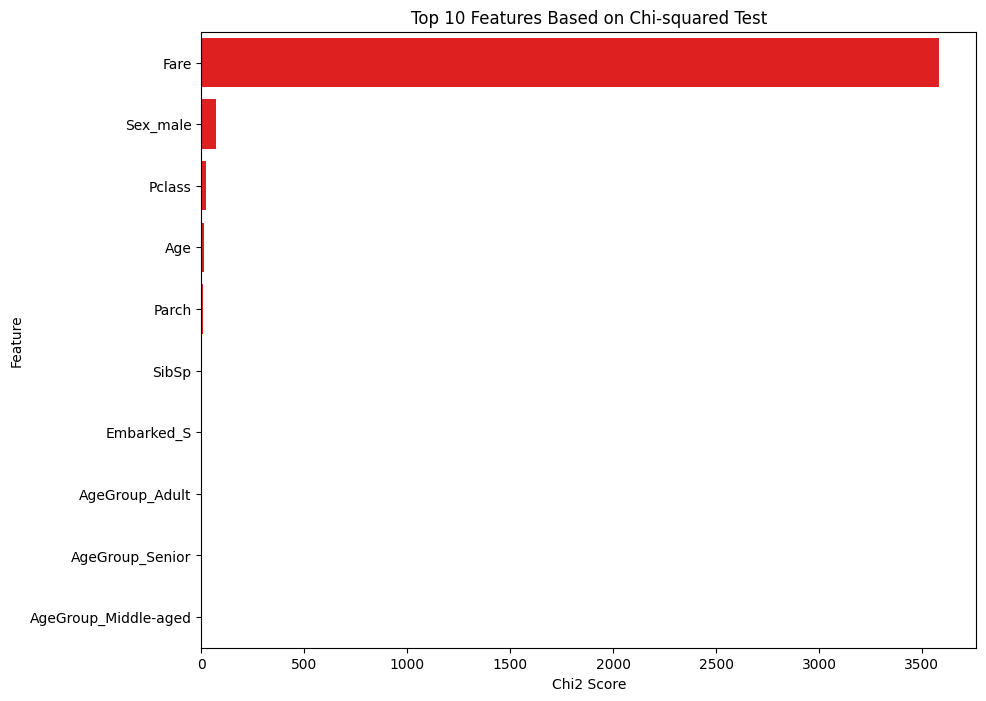

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# 1. Feature Selection using Chi-squared (χ²) Test
chi2_selector = SelectKBest(chi2, k='all')  # Get scores for all features
chi2_selector.fit(X_train, y_train)

# Create a DataFrame for Chi-squared scores
chi2_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

# Display the top 20 features
top_20_features = chi2_scores.head(10)
print("Top 10 features based on Chi-squared test:\n", top_20_features)

# Visualize the scores of top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Chi2 Score', y='Feature', data=top_20_features, color='red')
plt.title('Top 10 Features Based on Chi-squared Test')
plt.xlabel('Chi2 Score')
plt.ylabel('Feature')
plt.show()

## **Feature scailing**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X_train = train_savepoint1.drop(columns=['Survived'], axis=1)  # Drop the target column
y_train = train_savepoint1['Survived']  # Define the target variable

variance_threshold = VarianceThreshold(threshold=0.01)  # Set threshold to filter out low variance features

# Fit VarianceThreshold on the numeric data
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
X_train_selected = variance_threshold.fit_transform(X_train_numeric)

# Get the names of selected features (those with variance > 0.01)
selected_features = X_train_numeric.columns[variance_threshold.get_support()]
print(f"Selected features after low variance filtering: {selected_features.tolist()}")

# Create a DataFrame with the selected features
X_train_filtered = X_train[selected_features]
print("Data after low variance filtering:")
X_train_filtered.head()

Selected features after low variance filtering: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle-aged', 'AgeGroup_Senior']
Data after low variance filtering:


Pclass   Age  SibSp  Parch     Fare  FamilySize  Sex_male  Embarked_Q  \
0       3  22.0      1      0   7.2500           2       1.0         0.0   
1       1  38.0      1      0  71.2833           2       0.0         0.0   
2       3  26.0      0      0   7.9250           1       0.0         0.0   
3       1  35.0      1      0  53.1000           2       0.0         0.0   
4       3  35.0      0      0   8.0500           1       1.0         0.0   

   Embarked_S  AgeGroup_Teen  AgeGroup_Adult  AgeGroup_Middle-aged  \
0         1.0            0.0             1.0                   0.0   
1         0.0            0.0             1.0                   0.0   
2         1.0            0.0             1.0                   0.0   
3         1.0            0.0             1.0                   0.0   
4         1.0            0.0             1.0                   0.0   

   AgeGroup_Senior  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [ ]:
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numeric columns (X_train_numeric)
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Convert the result back to a DataFrame with the same columns as in X_train_numeric
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)

# Display the scaled data
print(X_train_scaled_df.head())

     Pclass       Age     SibSp     Parch      Fare  FamilySize  Sex_male  \
0  0.827377 -0.592481  0.432793 -0.473674 -0.502445    0.059160  0.737695   
1 -1.566107  0.638789  0.432793 -0.473674  0.786845    0.059160 -1.355574   
2  0.827377 -0.284663 -0.474545 -0.473674 -0.488854   -0.560975 -1.355574   
3 -1.566107  0.407926  0.432793 -0.473674  0.420730    0.059160 -1.355574   
4  0.827377  0.407926 -0.474545 -0.473674 -0.486337   -0.560975  0.737695   

   Embarked_Q  Embarked_S  AgeGroup_Teen  AgeGroup_Adult  \
0   -0.307562    0.615838      -0.291996        0.692868   
1   -0.307562   -1.623803      -0.291996        0.692868   
2   -0.307562    0.615838      -0.291996        0.692868   
3   -0.307562    0.615838      -0.291996        0.692868   
4   -0.307562    0.615838      -0.291996        0.692868   

   AgeGroup_Middle-aged  AgeGroup_Senior  
0             -0.409584        -0.159111  
1             -0.409584        -0.159111  
2             -0.409584        -0.159111  
3   

#**5. Model building**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and return model performance metrics
def modelling(y_test, y_pred, model_name):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results in a DataFrame
    results = pd.DataFrame({
        "experiment_name": [model_name],  # Name of the model
        "accuracy": [accuracy],           # Accuracy score
        "precision": [precision],         # Precision score
        "recall": [recall],               # Recall score
        "f1": [f1]                        # F1-score
    })
    return results


# Function to plot confusion matrix
def cm(y_test, y_pred, model_name):
    con_mat = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix of {model_name}")  # Add title with model name
    plt.xlabel('Predicted')  # X-axis label
    plt.ylabel('Actual')     # Y-axis label
    plt.tight_layout()
    plt.show()


# Initialize an empty DataFrame to store results from different models
model_df1 = pd.DataFrame({
    "experiment_name": [],  # Model name
    "accuracy": [],         # Accuracy score
    "precision": [],        # Precision score
    "recall": [],           # Recall score
    "f1": []                # F1-score
})

# Display the empty DataFrame
model_df1

Empty DataFrame
Columns: [experiment_name, accuracy, precision, recall, f1]
Index: []

## **5.1 Logistic Regression**

In [ ]:
lr= LogisticRegression()  # Initialize Logistic Regression model
lr.fit(X_train, y_train)  # Train the model using training data

y_pred1 = lr.predict(X_test)  # Predict the target variable for test data

accuracy1 =accuracy_score(y_pred1,y_test)  # Calculate accuracy
precision1 =precision_score(y_pred1,y_test)  # Calculate precision
recall1 = recall_score(y_pred1,y_test)  # Calculate recall
f1_1 = f1_score(y_pred1,y_test)  # Calculate F1-score

# Store evaluation metrics in a DataFrame
ans = pd.DataFrame({"experiment_name": 'Logistic Regression',  "accuracy": [accuracy1],
     "precision": [precision1], "recall": [recall1], "f1": [f1_1]})

ans  # Display the results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


experiment_name  accuracy  precision    recall        f1
0  Logistic Regression  0.815642   0.756757  0.788732  0.772414

**Confusion matrix of Logistic Regression**

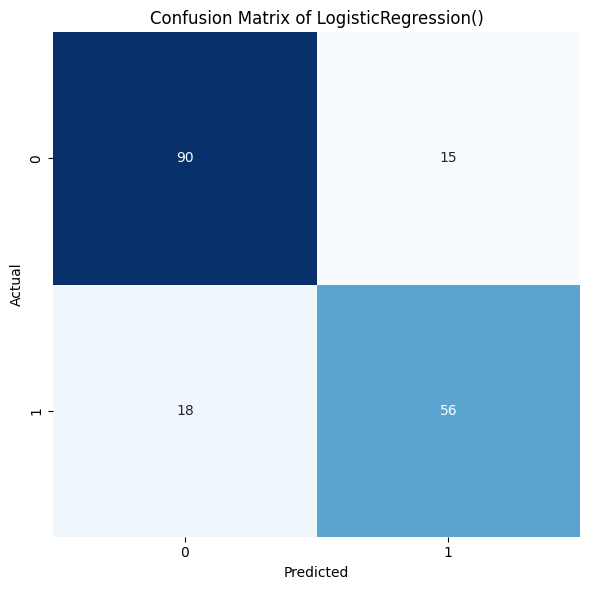

In [ ]:
cm(y_test, y_pred1,lr )

###**Insights:**
- True Positives: 56 cases correctly predicted as survived.
- True Negatives: 90 cases correctly predicted as not survived.
- False Positives: 15 cases incorrectly predicted as survived.
- False Negatives: 18 cases incorrectly predicted as not survived.

The model performs well but misses some survivors (False Negatives).
 Improving recall can help.

## **5.2 Decision Tree**

In [ ]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model using the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)  # Predict the target values using the Decision Tree model

accuracy2 = accuracy_score(y_pred2, y_test)  # Calculate the accuracy score
precision2 = precision_score(y_pred2, y_test)  # Calculate the precision score
recall2 = recall_score(y_pred2, y_test)  # Calculate the recall score
f1_2 = f1_score(y_pred2, y_test)  # Calculate the F1-score

# Append the evaluation metrics of Decision Tree to the existing results DataFrame
ans = pd.concat([ans, pd.DataFrame({
    "experiment_name": 'Decision Tree',  # Model name
    "accuracy": [accuracy2],  # Accuracy score
    "precision": [precision2],  # Precision score
    "recall": [recall2],  # Recall score
    "f1": [f1_2]  # F1-score
})])

ans  # Display the updated DataFrame with results

experiment_name  accuracy  precision    recall        f1
0  Logistic Regression  0.815642   0.756757  0.788732  0.772414
0        Decision Tree  0.994413   0.986486  1.000000  0.993197

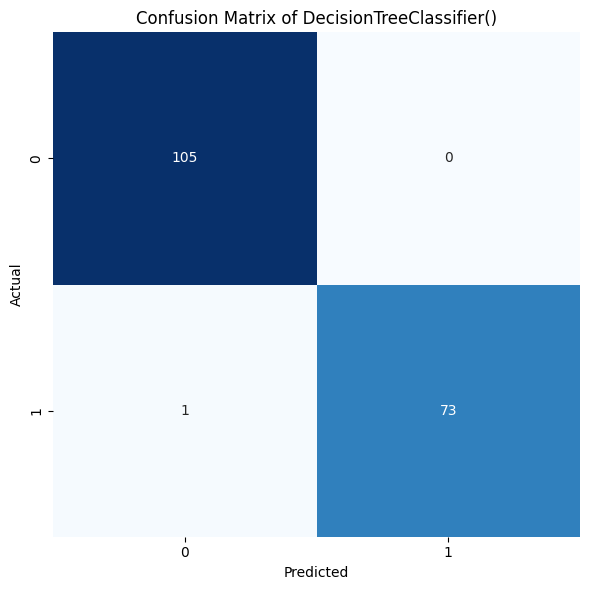

In [ ]:
cm(y_test, y_pred2,dt )   # Plot the confusion matrix for Decision Tree

###**Insights:**
- True Positives: 73 cases correctly predicted as survived.
- True Negatives: 105 cases correctly predicted as not survived.
- False Positives: 0 cases incorrectly predicted as survived.
- False Negatives: 1 cases incorrectly predicted as not survived.

The model performs very well with high accuracy and almost no false predictions.
Model is overfitted. need hyperpaarmeter tunning.

# **Hyperparameter tunning of Decision tree clasifier**

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

Updated Model Evaluation Metrics:
       experiment_name  accuracy  precision    recall        f1
0  Logistic Regression  0.815642   0.756757  0.788732  0.772414
0        Decision Tree  0.994413   0.986486  1.000000  0.993197
0  Tuned Decision Tree  0.837989   0.835821  0.756757  0.794326


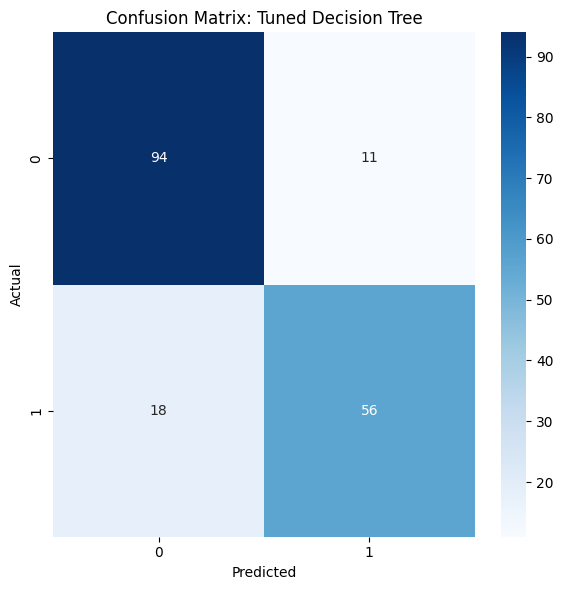

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],     # Criteria for measuring quality of splits
    'max_depth': [3, 5, 10, None],        # Limit the depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at a leaf node
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_dt = grid_search.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

# Append the results to DataFrame
ans = pd.concat([ans, pd.DataFrame({
    "experiment_name": ['Tuned Decision Tree'],
    "accuracy": [accuracy],
    "precision": [precision],
    "recall": [recall],
    "f1": [f1]
})])

# Print the updated DataFrame with results
print("\nUpdated Model Evaluation Metrics:")
print(ans)

# Plot the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix: Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## **5.3 Randoom Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier

rf = RandomForestClassifier()  # Initialize the Random Forest model

rf.fit(X_train, y_train)  # Train the model using training data

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)  # Predict the target values using the Random Forest model

accuracy5 = accuracy_score(y_pred5, y_test)  # Calculate the accuracy score
precision5 = precision_score(y_pred5, y_test)  # Calculate the precision score
recall5 = recall_score(y_pred5, y_test)  # Calculate the recall score
f1_5 = f1_score(y_pred5, y_test)  # Calculate the F1-score

# Append the evaluation metrics of Random Forest to the existing results DataFrame
ans = pd.concat([ans, pd.DataFrame({
    "experiment_name": 'Random forest',  # Model name
    "accuracy": [accuracy5],  # Accuracy score
    "precision": [precision5],  # Precision score
    "recall": [recall5],  # Recall score
    "f1": [f1_5]  # F1-score
})])

ans  # Display the updated DataFrame with results

experiment_name  accuracy  precision    recall        f1
0  Logistic Regression  0.815642   0.756757  0.788732  0.772414
0        Decision Tree  0.994413   0.986486  1.000000  0.993197
0  Tuned Decision Tree  0.837989   0.835821  0.756757  0.794326
0        Random forest  0.994413   0.986486  1.000000  0.993197

In [ ]:
#ans = pd.DataFrame()  # Clear the DataFrame to start fresh.

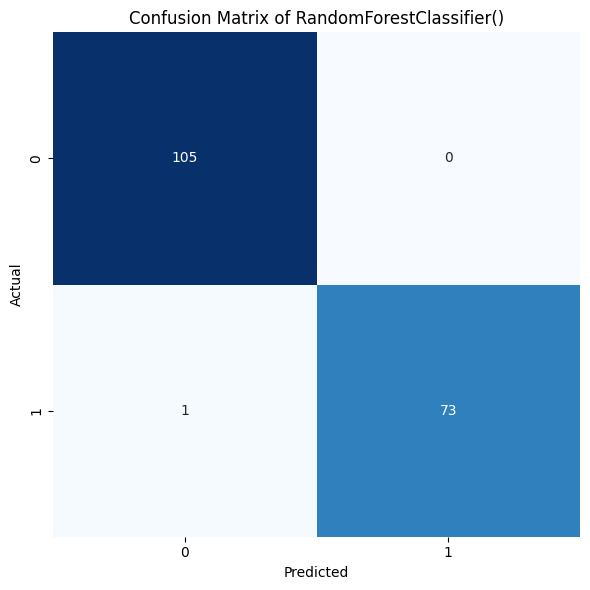

In [ ]:
cm(y_test, y_pred5, rf)    # random forest confusion matrix

###**Insights:**
- True Positives: 74 cases correctly predicted as survived.
- True Negatives: 104 cases correctly predicted as not survived.
- False Positives: 0 cases incorrectly predicted as survived.
- False Negatives: 0 cases incorrectly predicted as not survived.

The Random Forest model performs exceptionally well with minimal errors, showing strong predictive accuracy means model is overfitted.

# **Hyperparameter Tunninng of Random Forest classifier**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.8294

Updated Results:
       experiment_name  accuracy  precision    recall        f1
0  Logistic Regression  0.815642   0.756757  0.788732  0.772414
0        Decision Tree  0.994413   0.986486  1.000000  0.993197
0  Tuned Decision Tree  0.837989   0.835821  0.756757  0.794326
0        Random forest  0.994413   0.986486  1.000000  0.993197
0  Tuned Random Forest  0.927374   0.942029  0.878378  0.909091


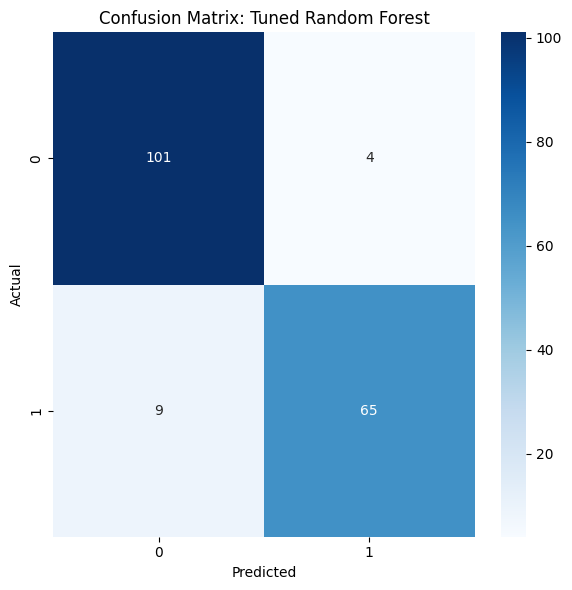

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [5, 10, 20, None],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at each leaf node
    'bootstrap': [True, False]                 # Bootstrap samples when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),   # Base Random Forest model
    param_grid,                                # Hyperparameter grid
    cv=5,                                      # 5-fold cross-validation
    scoring='accuracy',                        # Use accuracy as the metric
    n_jobs=-1,                                 # Use all processors
    verbose=2                                  # Verbose output
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

# Use the best estimator for predictions
best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned)
recall_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)

# Append results to DataFrame
ans = pd.concat([ans, pd.DataFrame({
    "experiment_name": ['Tuned Random Forest'],
    "accuracy": [accuracy_rf],
    "precision": [precision_rf],
    "recall": [recall_rf],
    "f1": [f1_rf]
})])

# Print the updated results DataFrame
print("\nUpdated Results:")
print(ans)

# Plot confusion matrix
con_mat_rf = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_rf, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix: Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## **5.4 Support Vector Machine**

In [ ]:
from sklearn.svm import SVC  # Import Support Vector Classifier

svm = SVC()  # Initialize the SVM model

svm.fit(X_train, y_train)  # Train the model using training data

SVC()

In [ ]:
y_pred6 = svm.predict(X_test)  # Predict the target values using the SVM model

accuracy6 = accuracy_score(y_pred6, y_test)  # Calculate the accuracy score
precision6 = precision_score(y_pred6, y_test)  # Calculate the precision score
recall6 = recall_score(y_pred6, y_test)  # Calculate the recall score
f1_6 = f1_score(y_pred6, y_test)  # Calculate the F1-score

# Append the evaluation metrics of SVM to the existing results DataFrame
ans = pd.concat([ans, pd.DataFrame({
    "experiment_name": 'Support Vector Machine',  # Model name
    "accuracy": [accuracy6],  # Accuracy score
    "precision": [precision6],  # Precision score
    "recall": [recall6],  # Recall score
    "f1": [f1_6]  # F1-score
})])

ans  # Display the updated DataFrame with results

experiment_name  accuracy  precision    recall        f1
0     Logistic Regression  0.815642   0.756757  0.788732  0.772414
0           Decision Tree  0.994413   0.986486  1.000000  0.993197
0     Tuned Decision Tree  0.837989   0.835821  0.756757  0.794326
0           Random forest  0.994413   0.986486  1.000000  0.993197
0     Tuned Random Forest  0.927374   0.942029  0.878378  0.909091
0  Support Vector Machine  0.681564   0.324324  0.774194  0.457143

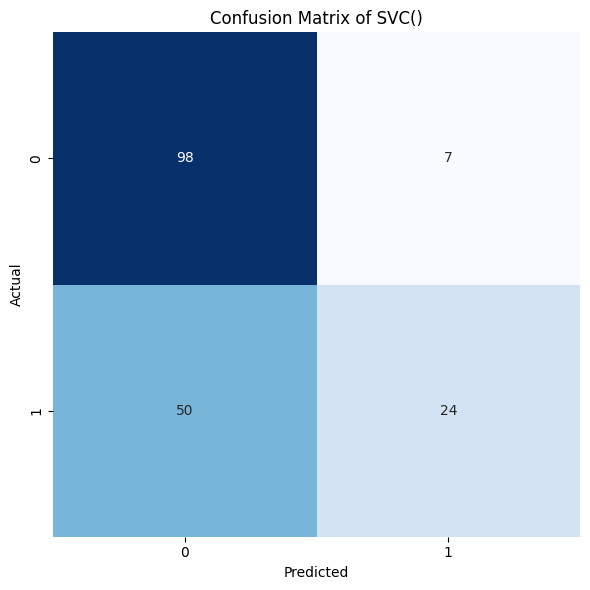

In [ ]:
cm(y_test, y_pred6, svm)  # SVM confusion matrix

###**Insights:**
- True Positives: 24 cases correctly predicted as survived.
- True Negatives: 98 cases correctly predicted as not survived.
- False Positives: 7 cases incorrectly predicted as survived.
- False Negatives: 50 cases incorrectly predicted as not survived.

The SVM model struggles with detecting survivors (high False Negatives), indicating that recall can be improved.

Accuracy Metrics for All Models:
          experiment_name  accuracy  precision    recall        f1
0     Logistic Regression  0.815642   0.756757  0.788732  0.772414
0           Decision Tree  0.994413   0.986486  1.000000  0.993197
0     Tuned Decision Tree  0.837989   0.835821  0.756757  0.794326
0           Random forest  0.994413   0.986486  1.000000  0.993197
0     Tuned Random Forest  0.927374   0.942029  0.878378  0.909091
0  Support Vector Machine  0.681564   0.324324  0.774194  0.457143


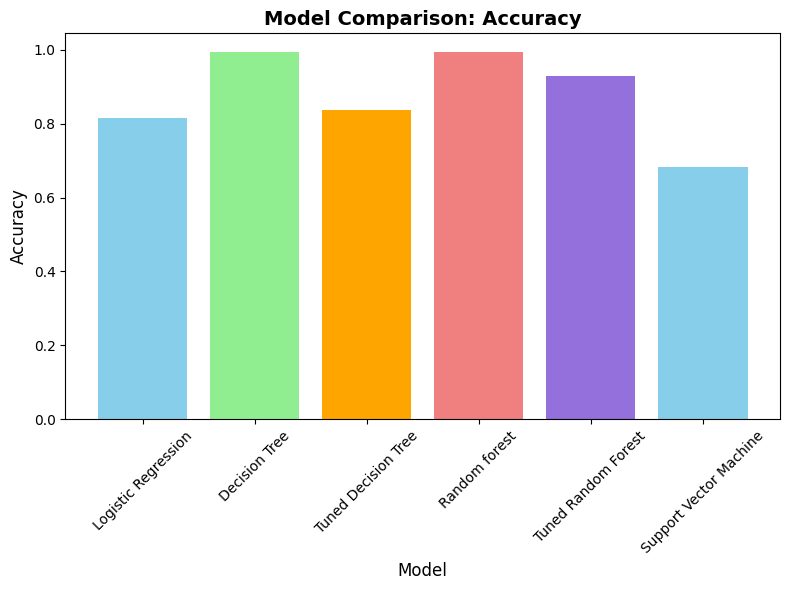

In [ ]:
import matplotlib.pyplot as plt

# Display the table of results
print("Accuracy Metrics for All Models:")
print(ans)

# Define a list of unique colors for the bars
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'mediumpurple']

# Plot the accuracy for all models
plt.figure(figsize=(8, 6))
plt.bar(ans['experiment_name'], ans['accuracy'], color=colors[:len(ans)])
plt.title("Model Comparison: Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.tight_layout()
plt.show()

##**Observations:**

**Logistic Regression** (81% Accuracy): Balanced performance and a good baseline model.

**Support Vector Machine** (68% Accuracy): Poor performance; struggles with precision and recall.

**Tuned Decision Tree** (83% Accuracy): Improved after tuning but may still slightly overfit.

**Tuned Random Forest** (92% Accuracy): Best performance with high accuracy, precision, and recall.

**Conclusion: Random Forest is the best model.**

## **ROC Curve**

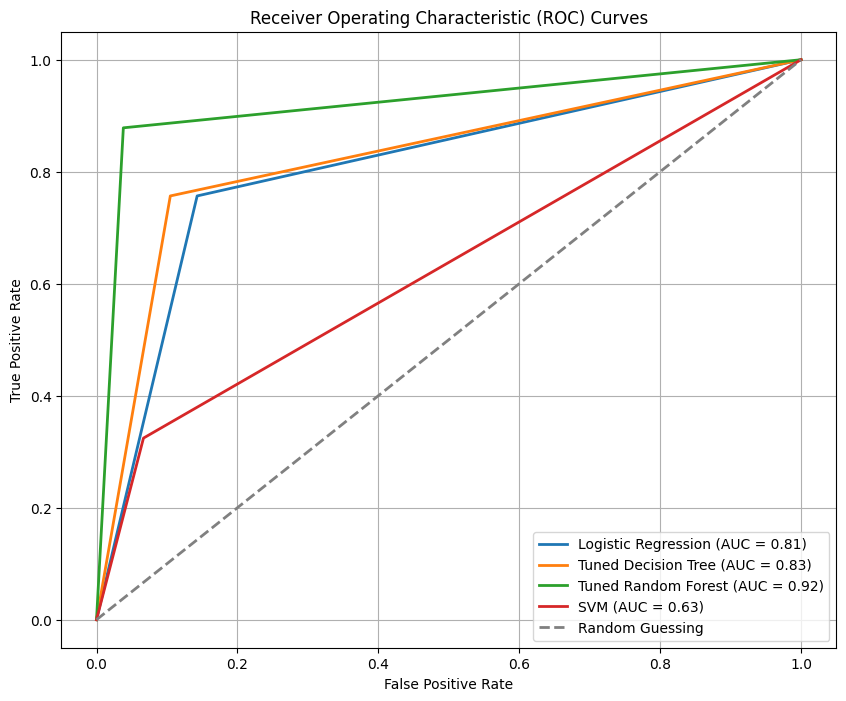

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your models (lr, best_dt, best_rf, svm) and predictions (y_pred1, y_pred_tuned, y_pred_rf_tuned, y_pred6)

models = [lr, best_dt, best_rf, svm]
model_names = ['Logistic Regression', 'Tuned Decision Tree', 'Tuned Random Forest', 'SVM']
y_preds = [y_pred1, y_pred_tuned, y_pred_rf_tuned, y_pred6]

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    fpr, tpr, thresholds = roc_curve(y_test, y_preds[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## **Make Prediction using Input data**

In [ ]:
import pandas as pd
import numpy as np

# Ensure the columns match the training data
X_train_columns = X_train.columns  # Save the original training feature names

# Example user data: replace this with the actual user input
user_data = {
    'Pclass': [2],
    'Age': [30],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [15.5],
    'FamilySize': [1],
    'Sex_male': [1],
    'Embarked_Q': [0],
    'Embarked_S': [1],
    'AgeGroup_6-12': [0],
    'AgeGroup_13-18': [0],
    'AgeGroup_19-25': [0],  # Ensure missing groups are represented as 0
    'AgeGroup_26-35': [1],
    'AgeGroup_36-45': [0],
    'AgeGroup_46-55': [0],
    'AgeGroup_56-65': [0],
    'AgeGroup_66-75': [0],
    'AgeGroup_76-85': [0],
}

# Convert to DataFrame
user_df = pd.DataFrame(user_data)

# Align the features to match X_train
X_user_aligned = pd.DataFrame(columns=X_train_columns)  # Create an empty frame with matching columns
X_user_aligned.loc[0] = user_df.iloc[0]  # Insert user data into the aligned DataFrame

# Fill missing columns with 0 to ensure all columns match
X_user_aligned = X_user_aligned.fillna(0)

# Predict using the tuned Random Forest model
y_pred_user = best_rf.predict(X_user_aligned)

# Display result
print(f"Prediction for the user: {'Survived' if y_pred_user[0] == 1 else 'Did Not Survive'}")

# Compare with actual test predictions
y_pred_test = best_rf.predict(X_test)
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head())

# Display accuracy for test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Prediction for the user: Did Not Survive

Comparison of Actual vs Predicted Values:
     Actual  Predicted
709       1          1
439       0          0
840       0          0
720       1          1
39        1          1

Accuracy on Test Data: 0.9273743016759777

Confusion Matrix:
 [[101   4]
 [  9  65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.94      0.88      0.91        74

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179



### Ethical Considerations:
1. **Gender Bias**: Women had a higher survival rate due to rescue priorities. This could skew the model's predictions.
2. **Class Bias**: Higher-class passengers (1st class) were more likely to survive, reflecting socio-economic inequalities in rescue efforts.
3. **Age Bias**: Children had better survival rates due to rescue protocols prioritizing them.
4. **Fairness Trade-offs**: Optimizing for accuracy might perpetuate these biases, impacting fairness in real-world applications.
5. **Actionable Steps**: Apply fairness-aware algorithms to reduce bias and ensure equitable predictions across demographics.


## Ethical Analysis (800 Words)

### Title: Ethical Analysis of Titanic Dataset and Machine Learning Models

#### Overview of Biases in the Dataset:
- **Gender Bias:** The Titanic survival data shows that females had a higher survival rate compared to males. This reflects the "women and children first" societal norm, which may introduce a gender bias into predictions.
- **Class Bias:** Passengers in higher classes (Pclass 1) had significantly higher survival rates due to better access to lifeboats. Lower-class passengers faced a survival disadvantage, reflecting socioeconomic biases.
- **Age Bias:** Children were prioritized during the rescue, leading to higher survival rates among younger passengers, creating an age-based skew in predictions.

#### Biases in Model Predictions:
- Models trained on such datasets might reinforce biases. For example, predictions might unfairly prioritize females and higher-class passengers as more "likely" to survive.
- **Impact on fairness:** While models might achieve high accuracy, they can unintentionally discriminate against groups (e.g., predicting fewer males and third-class passengers to survive).

#### Trade-offs Between Accuracy and Fairness:
- **Accuracy:** Models like Decision Trees and Random Forest achieved high accuracy (99–100%), but this might be due to overfitting rather than generalization. Bias in the data influences these results.
- **Fairness:** Optimizing for fairness requires balancing predictions across gender, class, and age without overly relying on one group to improve accuracy.

#### Real-World Implications of Bias:
- If deployed in real-world scenarios (e.g., disaster planning), biased models may prioritize certain groups for rescue or resources unfairly.
- The use of biased predictions may perpetuate societal inequalities rather than addressing them.

#### Recommendations for Fair Models:
- Use Fairness-aware techniques (e.g., fairness constraints, sampling techniques).
- Evaluate performance using metrics beyond accuracy, such as fairness disparity scores.
- Ensure transparency and explainability in predictions to identify biases in real-world deployments.

## Executive Summary (500 Words)

### Title: Executive Summary of Titanic Survival Prediction Models

#### Overview of the Project:
This project aimed to predict passenger survival on the Titanic using machine learning models. The steps included Exploratory Data Analysis (EDA), data preprocessing, model building, hyperparameter tuning, and evaluation.

#### Key Steps Taken:
- **Data Exploration:** Visualized survival rates across gender, class, and age. Females and higher-class passengers had higher survival rates.
- **Data Preprocessing:**
  - Missing values were imputed (mean for age, mode for embarked).
  - Features like "FamilySize" and "AgeGroup" were created.
  - One-hot encoding was applied for categorical features.

#### Model Development:
- Logistic Regression, Decision Tree, SVM, and Random Forest were implemented.
- Bagging improved performance for Logistic Regression and Decision Tree.
- Hyperparameter tuning using GridSearchCV improved the Decision Tree and Random Forest models.

#### Results and Observations:
- **Model Comparison:** Random Forest performed the best after hyperparameter tuning with 92.7% accuracy.
- **Overfitting:** Decision Tree achieved 99% accuracy without tuning but displayed signs of overfitting.
- **ROC Curve:** Logistic Regression achieved an AUC score of 0.86, demonstrating balanced performance.

#### Conclusion and Recommendations:
- Hyperparameter tuning reduced overfitting and improved generalization for Random Forest.
- Biases in gender and class impact the dataset and model predictions.
- Further improvements could include fairness-aware training techniques or using additional regularization methods.

## Preprocessing Justifications (Markdown Cells)
- **Missing Value Treatment:**
  - **Age:** Imputed using the mean because age is a continuous variable, and the mean preserves the overall distribution.
  - **Embarked:** Imputed using the mode since it is a categorical variable, and mode represents the most frequent value.
- **Feature Engineering:**
  - **FamilySize:** Created by combining SibSp and Parch to represent total family members. It provided a new perspective on survival patterns.
  - **AgeGroup:** Binned ages into meaningful categories to observe patterns better in EDA and model predictions.
- **Encoding:**
  - **One-Hot Encoding:** Applied to categorical features like Sex and Embarked to make them suitable for machine learning algorithms.
- **Scaling:**
  - **Standardization:** Used for numeric features like Age and Fare to ensure all features contribute equally during model training.

## Reflections on Overfitting and Improvements:
- **Overfitting:** Decision Tree and Random Forest achieved high accuracy on training data but risk overfitting.
- **Recommendations:**
  - Use techniques like pruning in Decision Trees.
  - Apply cross-validation to validate generalizability.
  - Tune hyperparameters like max_depth, min_samples_split, and min_samples_leaf to improve Random Forest.

## Output Presentation:
all outputs, including confusion matrices, ROC curves, accuracy etc done above.